In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
import numpy as np
import matplotlib.pyplot as plt

from particle import literals as lp # --> MeV units
import hepunits as u # converting to GeV

from Mu3e import fastmc as fm
from Mu3e import mudecays
from Mu3e import plot_tools as pt

# from DarkNews import plot_tools as pt

## The model

In [299]:
from Mu3e import models
baseline_model = models.DS(maprime=30, mphi=90, Femu=1e-12, alphaD=1/137, epsilon=1e-4)

print(f'ctau h = {baseline_model.get_phi_ctau0()*1e12:.2g} fm')
print(f'tau h = {baseline_model.get_phi_tau0()*1e9:.2g} ns\n')
print(f'ctau aprime = {baseline_model.get_aprime_ctau0():.2g} mm')
print(f'tau aprime = {baseline_model.get_aprime_tau0()*1e9:.2g} ns\n')

print(f'B(µ --> e phi) = {baseline_model.get_mu5e_BR():.2g}')

ctau h = 2.9e+02 fm
tau h = 9.8e-13 ns

ctau aprime = 0.27 mm
tau aprime = 0.0009 ns

B(µ --> e phi) = 1.4e-08


## Generating events

In [363]:
NEVENTS = int(3e5)
mu1e2nu = mudecays.Process(channel='mu1e2nu', n_events=NEVENTS)
mu1e2nu.initialize_amplitude()
mu1e2nu.generate()
mu1e2nu.evaluate_amplitude()
mu1e2nu.place_it_in_Mu3e()

mu3e2nu = mudecays.Process(channel='mu3e2nu', n_events=NEVENTS)
mu3e2nu.initialize_amplitude()
mu3e2nu.generate()
mu3e2nu.evaluate_amplitude()
mu3e2nu.place_it_in_Mu3e()

3mu5e2nu = mudecays.Process(channel='mu5e2nu', n_events=NEVENTS)
mu5e2nu.initialize_amplitude()
mu5e2nu.generate()
mu5e2nu.evaluate_amplitude()
mu5e2nu.place_it_in_Mu3e()

In [364]:
# New physics 
mu5e = mudecays.Process(channel='mu5e', model=baseline_model, n_events=NEVENTS)
mu5e.initialize_amplitude()
mu5e.generate()
mu5e.evaluate_amplitude()
mu5e.place_it_in_Mu3e()

In [377]:
tracks = {}
Etot = {}
Emiss = {}
total_eminus_energy = {}
 = {}
for decay in [mu1e2nu, mu3e2nu, mu5e2nu, mu5e]:

    tracks[decay.channel] = decay.get_track_moomenta()

    Etot[decay.channel] = np.zeros(decay.n_events)
    total_eminus_energy[decay.channel] = np.zeros(decay.n_events)
    for name, track in tracks[decay.channel].items():
        # print(name)
        Etot[decay.channel] += track[:,0]
        if 'e-' in name:
            total_eminus_energy[decay.channel] += track[:,0]

    Emiss[decay.channel] = decay.p_parent[:,0] - Etot[decay.channel]


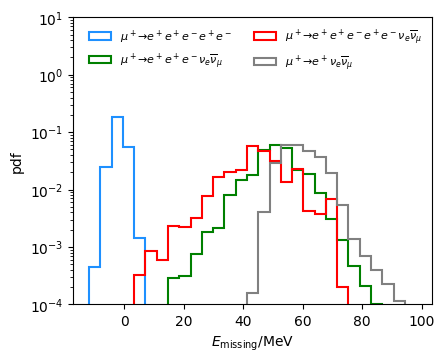

In [366]:
fig, ax = pt.std_fig()
BINS = np.linspace(-10,100,30)
mask = mu5e.n_long_tracks >= 4

_ = plt.hist( Emiss['mu5e'], weights=mu5e.weights, bins=BINS, histtype='step', label=mu5e.latex_name, density=True,  align='left', lw=1.5, color='dodgerblue')
_ = plt.hist( Emiss['mu3e2nu'], weights=mu3e2nu.weights, bins=BINS, histtype='step', label=mu3e2nu.latex_name, density=True,  align='left', lw=1.5, color='green')
_ = plt.hist( Emiss['mu5e2nu'], weights=mu5e2nu.weights, bins=BINS, histtype='step', label=mu5e2nu.latex_name, density=True,  align='left', lw=1.5, color='red')
_ = plt.hist( Emiss['mu1e2nu'], weights=mu1e2nu.weights, bins=BINS, histtype='step', label=mu1e2nu.latex_name, density=True,  align='left', lw=1.5, color='gray')


plt.xlabel(r'$E_{\rm missing}$/MeV')
plt.ylabel('pdf')
plt.yscale("log")
plt.legend(frameon=False, fontsize=8, ncol=2)
plt.ylim(1e-4,1e1)
plt.savefig('plots/all_missing_energy.png', dpi=400)

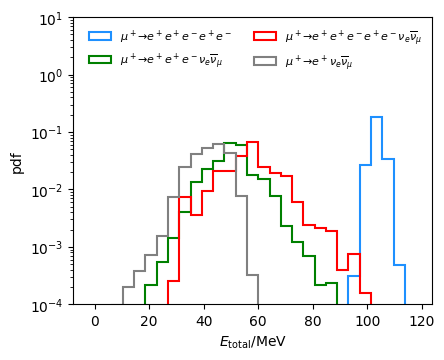

In [367]:
fig, ax = pt.std_fig()
BINS = np.linspace(0,120,30)
mask = mu5e.n_long_tracks >= 4

_ = plt.hist( Etot['mu5e'], weights=mu5e.weights, bins=BINS, histtype='step', label=mu5e.latex_name, density=True,  align='left', lw=1.5, color='dodgerblue')
_ = plt.hist( Etot['mu3e2nu'], weights=mu3e2nu.weights, bins=BINS, histtype='step', label=mu3e2nu.latex_name, density=True,  align='left', lw=1.5, color='green')
_ = plt.hist( Etot['mu5e2nu'], weights=mu5e2nu.weights, bins=BINS, histtype='step', label=mu5e2nu.latex_name, density=True,  align='left', lw=1.5, color='red')
_ = plt.hist( Etot['mu1e2nu'], weights=mu1e2nu.weights, bins=BINS, histtype='step', label=mu1e2nu.latex_name, density=True,  align='left', lw=1.5, color='gray')


plt.xlabel(r'$E_{\rm total}$/MeV')
plt.ylabel('pdf')
plt.yscale("log")
plt.legend(frameon=False, fontsize=8, ncol=2)
plt.ylim(1e-4,1e1)
plt.savefig('plots/total_missing_energy.png', dpi=400)

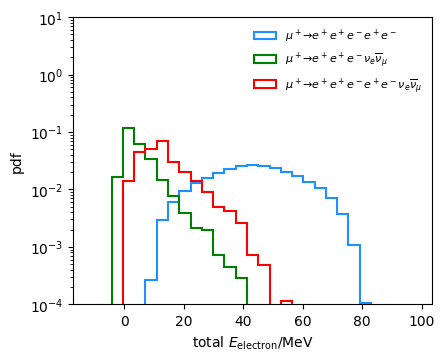

In [384]:
fig, ax = pt.std_fig()
BINS = np.linspace(-10,100,30)

_ = plt.hist( total_eminus_energy['mu5e'], weights=mu5e.weights, bins=BINS, histtype='step', label=mu5e.latex_name, density=True,  align='left', lw=1.5, color='dodgerblue')
_ = plt.hist( total_eminus_energy['mu3e2nu'], weights=mu3e2nu.weights, bins=BINS, histtype='step', label=mu3e2nu.latex_name, density=True,  align='left', lw=1.5, color='green')
_ = plt.hist( total_eminus_energy['mu5e2nu'], weights=mu5e2nu.weights, bins=BINS, histtype='step', label=mu5e2nu.latex_name, density=True,  align='left', lw=1.5, color='red')
# _ = plt.hist( total_eminus_energy['mu1e2nu'], weights=mu1e2nu.weights, bins=BINS, histtype='step', label=mu1e2nu.latex_name, density=True,  align='left', lw=1.5, color='gray')


plt.xlabel(r'total $E_{\rm electron}$/MeV')
plt.ylabel('pdf')
plt.yscale("log")
plt.legend(frameon=False, fontsize=8, ncol=1)
plt.ylim(1e-4,1e1)
plt.savefig('plots/all_missing_energy.png', dpi=400)

In [385]:
print(f'mu1e2nu --- eff Emiss < 10 MeV: {mu1e2nu.weights[(Emiss["mu1e2nu"] < 10)].sum()/mu1e2nu.weights.sum():.2g}')
print(f'mu3e2nu --- eff Emiss < 10 MeV: {mu3e2nu.weights[(Emiss["mu3e2nu"] < 10)].sum()/mu3e2nu.weights.sum():.2g}')
print(f'mu5e2nu --- eff Emiss < 10 MeV: {mu5e2nu.weights[(Emiss["mu5e2nu"] < 10)].sum()/mu5e2nu.weights.sum():.2g}')
print(f'mu5e --- eff Emiss < 10 MeV: {mu5e.weights[(Emiss["mu5e"] < 10)].sum()/mu5e.weights.sum():.2g}')

print(f'\nmu1e2nu --- eff all short tracks: {mu1e2nu.weights[(mu1e2nu.n_short_tracks == mu1e2nu.n_tracks)].sum()/mu1e2nu.weights.sum():.2g}')
print(f'mu3e2nu --- eff all short tracks: {mu3e2nu.weights[(mu3e2nu.n_short_tracks == mu3e2nu.n_tracks)].sum()/mu3e2nu.weights.sum():.2g}')
print(f'mu5e2nu --- eff all short tracks: {mu5e2nu.weights[(mu5e2nu.n_short_tracks == mu5e2nu.n_tracks)].sum()/mu5e2nu.weights.sum():.2g}')
print(f'mu5e --- eff all short tracks: {mu5e.weights[(mu5e.n_short_tracks == mu5e.n_tracks)].sum()/mu5e.weights.sum():.2g}')

print(f'\nmu1e2nu --- eff all short tracks & Emiss < 10 MeV: {mu1e2nu.weights[Emiss["mu1e2nu"]<10 & (mu1e2nu.n_long_tracks == mu1e2nu.n_tracks)].sum()/mu1e2nu.weights.sum():.2g}')
print(f'mu3e2nu --- eff all short tracks & Emiss < 10 MeV: {mu3e2nu.weights[Emiss["mu3e2nu"]<10 & (mu3e2nu.n_long_tracks == mu3e2nu.n_tracks)].sum()/mu3e2nu.weights.sum():.2g}')
print(f'mu5e2nu --- eff all short tracks & Emiss < 10 MeV: {mu5e2nu.weights[Emiss["mu5e2nu"]<10 & (mu5e2nu.n_long_tracks == mu5e2nu.n_tracks)].sum()/mu5e2nu.weights.sum():.2g}')
print(f'mu5e --- eff all short tracks & Emiss < 10 MeV: {mu5e.weights[Emiss["mu5e"]<10 & (mu5e.n_long_tracks == mu5e.n_tracks)].sum()/mu5e.weights.sum():.2g}')


print(f'\nmu1e2nu --- eff all long tracks: {mu1e2nu.weights[(mu1e2nu.n_long_tracks == mu1e2nu.n_tracks)].sum()/mu1e2nu.weights.sum():.2g}')
print(f'mu3e2nu --- eff all long tracks: {mu3e2nu.weights[(mu3e2nu.n_long_tracks == mu3e2nu.n_tracks)].sum()/mu3e2nu.weights.sum():.2g}')
print(f'mu5e2nu --- eff all long tracks: {mu5e2nu.weights[(mu5e2nu.n_long_tracks == mu5e2nu.n_tracks)].sum()/mu5e2nu.weights.sum():.2g}')
print(f'mu5e --- eff all long tracks: {mu5e.weights[(mu5e.n_long_tracks == mu5e.n_tracks)].sum()/mu5e.weights.sum():.2g}')

mu1e2nu --- eff Emiss < 10 MeV: 0
mu3e2nu --- eff Emiss < 10 MeV: 9.6e-05
mu5e2nu --- eff Emiss < 10 MeV: 0.0037
mu5e --- eff Emiss < 10 MeV: 1

mu1e2nu --- eff all short tracks: 0.95
mu3e2nu --- eff all short tracks: 0.013
mu5e2nu --- eff all short tracks: 0.0006
mu5e --- eff all short tracks: 0.04

mu1e2nu --- eff all short tracks & Emiss < 10 MeV: 0
mu3e2nu --- eff all short tracks & Emiss < 10 MeV: 5.8e-08
mu5e2nu --- eff all short tracks & Emiss < 10 MeV: 2.3e-07
mu5e --- eff all short tracks & Emiss < 10 MeV: 0.5

mu1e2nu --- eff all long tracks: 0.24
mu3e2nu --- eff all long tracks: 0.00048
mu5e2nu --- eff all long tracks: 2.2e-08
mu5e --- eff all long tracks: 0.002


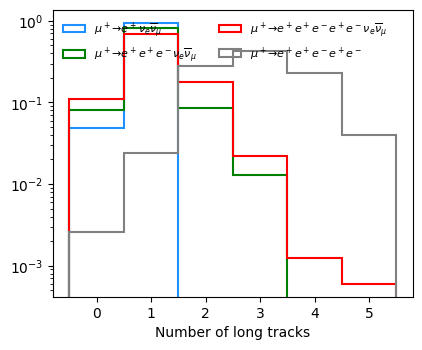

In [386]:
fig, ax = pt.std_fig()
BINS = range(0,7)
_ = plt.hist( mu1e2nu.n_short_tracks, weights=mu1e2nu.weights, bins=BINS, histtype='step', label=mu1e2nu.latex_name, density=True,  align='left', lw=1.5, color='dodgerblue')
_ = plt.hist( mu3e2nu.n_short_tracks, weights=mu3e2nu.weights, bins=BINS, histtype='step', label=mu3e2nu.latex_name, density=True,  align='left', lw=1.5, color='green')
_ = plt.hist( mu5e2nu.n_short_tracks, weights=mu5e2nu.weights, bins=BINS, histtype='step', label=mu5e2nu.latex_name, density=True,  align='left', lw=1.5, color='red')
_ = plt.hist( mu5e.n_short_tracks, weights=mu5e.weights, bins=BINS, histtype='step', label=mu5e.latex_name, density=True,  align='left', lw=1.5, color='gray')

plt.yscale('log')

ax.legend(frameon=False, fontsize=8, ncol=2, loc='upper left')

plt.xlabel('Number of long tracks')
plt.savefig('plots/number_of_short_tracks.png', dpi=400)

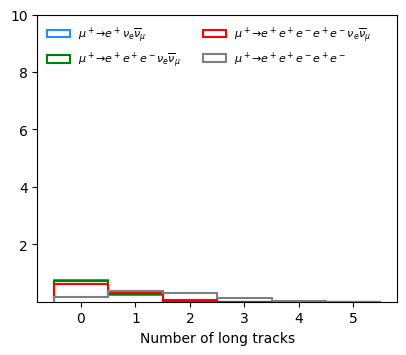

In [308]:
fig, ax = pt.std_fig()
BINS = range(0,7)
_ = plt.hist( mu1e2nu.n_long_tracks, weights=mu1e2nu.weights, bins=BINS, histtype='step', label=mu1e2nu.latex_name, density=True,  align='left', lw=1.5, color='dodgerblue')
_ = plt.hist( mu3e2nu.n_long_tracks, weights=mu3e2nu.weights, bins=BINS, histtype='step', label=mu3e2nu.latex_name, density=True,  align='left', lw=1.5, color='green')
_ = plt.hist( mu5e2nu.n_long_tracks, weights=mu5e2nu.weights, bins=BINS, histtype='step', label=mu5e2nu.latex_name, density=True,  align='left', lw=1.5, color='red')
_ = plt.hist( mu5e.n_long_tracks, weights=mu5e.weights, bins=BINS, histtype='step', label=mu5e.latex_name, density=True,  align='left', lw=1.5, color='gray')

# plt.yscale('log')
plt.ylim(1e-4,1e1)
ax.legend(frameon=False, fontsize=8, ncol=2, loc='upper left')

plt.xlabel('Number of long tracks')
plt.savefig('plots/number_of_tracks.png', dpi=400)

In [388]:
def get_dist_fig(log=False, xlabel='X var'):
    fig, ax = pt.std_fig()
    if log:
        ax.set_yscale('log')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('pdf')
    ax.set_ylim(1e-4,1e1)
    return fig, ax

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


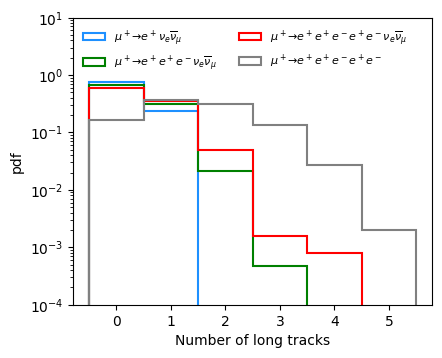

In [391]:
fig, ax = get_dist_fig(xlabel = r'Number of long tracks', log=True)

BINS = range(0,7)
_ = ax.hist( mu1e2nu.n_long_tracks, weights=mu1e2nu.weights, bins=BINS, histtype='step', label=mu1e2nu.latex_name, density=True,  align='left', lw=1.5, color='dodgerblue')
_ = ax.hist( mu3e2nu.n_long_tracks, weights=mu3e2nu.weights, bins=BINS, histtype='step', label=mu3e2nu.latex_name, density=True,  align='left', lw=1.5, color='green')
_ = ax.hist( mu5e2nu.n_long_tracks, weights=mu5e2nu.weights, bins=BINS, histtype='step', label=mu5e2nu.latex_name, density=True,  align='left', lw=1.5, color='red')
_ = ax.hist( mu5e.n_long_tracks, weights=mu5e.weights, bins=BINS, histtype='step', label=mu5e.latex_name, density=True,  align='left', lw=1.5, color='gray')
ax.legend(frameon=False, fontsize=8, ncol=2, loc='upper left')
fig.savefig('plots/number_of_long_tracks_log.png', dpi=400)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


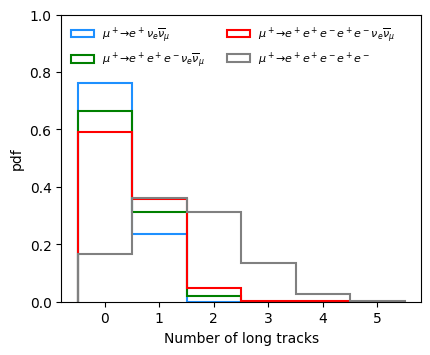

In [392]:
fig, ax = get_dist_fig(xlabel = r'Number of long tracks', log=False)

BINS = range(0,7)
_ = plt.hist( mu1e2nu.n_long_tracks, weights=mu1e2nu.weights, bins=BINS, histtype='step', label=mu1e2nu.latex_name, density=True,  align='left', lw=1.5, color='dodgerblue')
_ = plt.hist( mu3e2nu.n_long_tracks, weights=mu3e2nu.weights, bins=BINS, histtype='step', label=mu3e2nu.latex_name, density=True,  align='left', lw=1.5, color='green')
_ = plt.hist( mu5e2nu.n_long_tracks, weights=mu5e2nu.weights, bins=BINS, histtype='step', label=mu5e2nu.latex_name, density=True,  align='left', lw=1.5, color='red')
_ = plt.hist( mu5e.n_long_tracks, weights=mu5e.weights, bins=BINS, histtype='step', label=mu5e.latex_name, density=True,  align='left', lw=1.5, color='gray')

ax.legend(frameon=False, fontsize=8, ncol=2, loc='upper left')
ax.set_ylim(0,1)
fig.savefig('plots/number_of_long_tracks.png', dpi=400)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


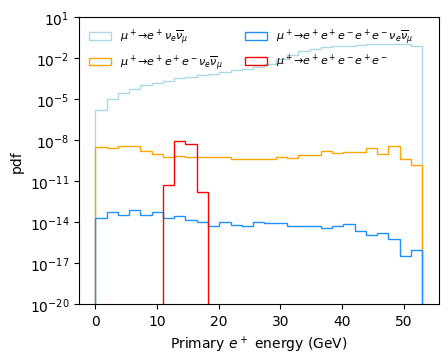

In [393]:
fig, ax = get_dist_fig(xlabel =r'Primary $e^+$ energy (GeV)', log=True)

BINS = np.linspace(0,53,30)
E_3 = mu1e2nu.particles['e+_0'][:,0]
E_5 = mu3e2nu.particles['e+_0'][:,0]
E_7 = mu5e2nu.particles['e+_0'][:,0]

E_NP = mu5e.particles['e+_0'][:,0]

_ = ax.hist(E_3, bins=BINS, weights=mu1e2nu.weights, histtype='step', label=mu1e2nu.latex_name, density=False, color='lightblue')
_ = ax.hist(E_5, bins=BINS, weights=mu3e2nu.weights, histtype='step', label=mu3e2nu.latex_name, density=False, color='orange')
_ = ax.hist(E_7, bins=BINS, weights=mu5e2nu.weights, histtype='step', label=mu5e2nu.latex_name, density=False, color='dodgerblue')

_ = ax.hist(E_NP, bins=BINS, weights=mu5e.weights, histtype='step', label=mu5e.latex_name, density=False, color='red')

ax.legend(frameon=False, fontsize=8, ncol=2, loc='upper left')
ax.set_ylim(1e-20,10)
fig.savefig('plots/primary_e+_energy.png', dpi=400)

/Users/matheushostert/Repos/mu_to_5e/Mu3e/plot_tools.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


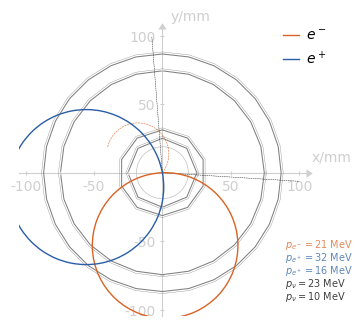

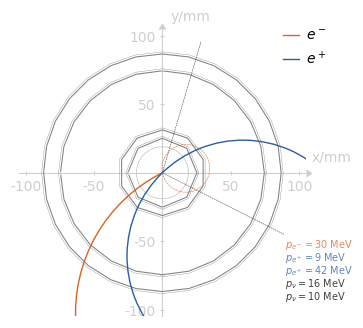

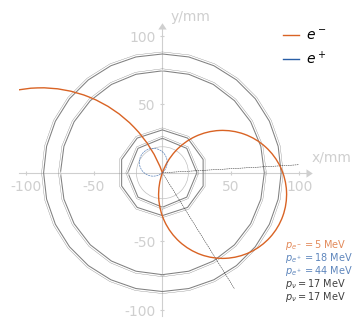

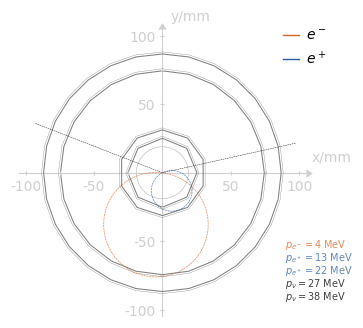

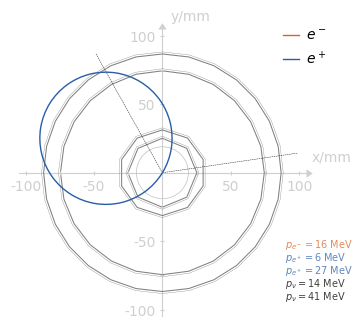

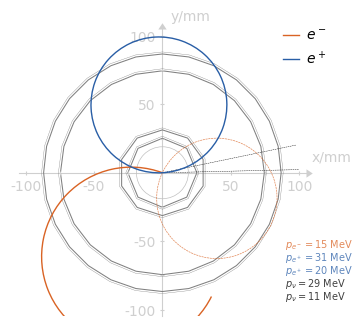

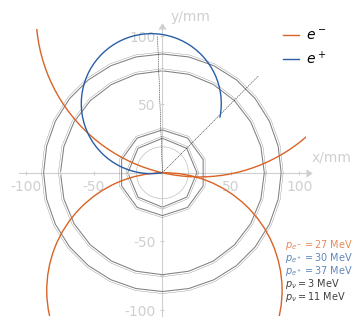

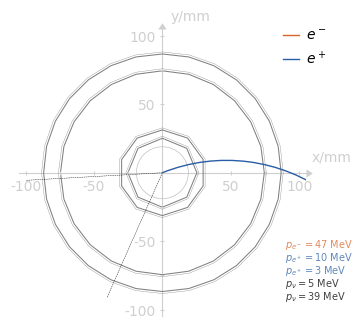

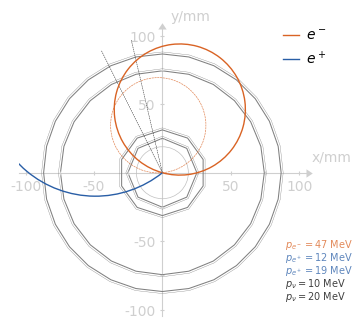

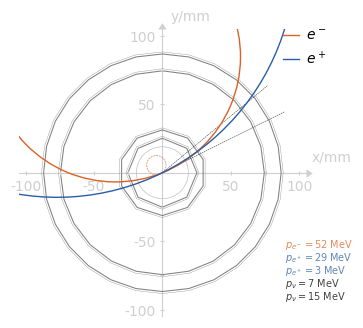

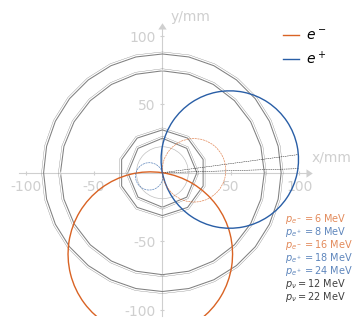

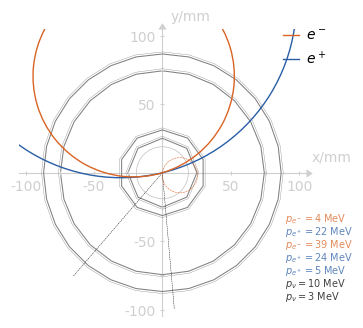

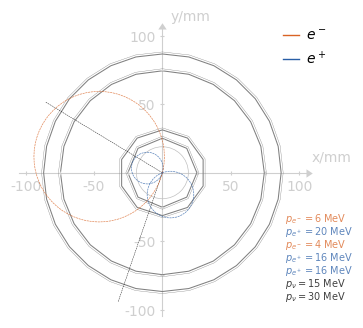

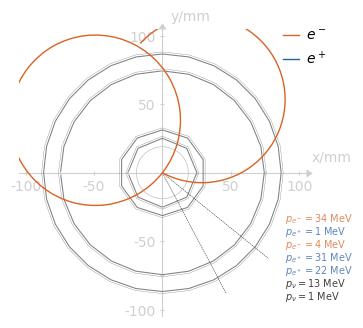

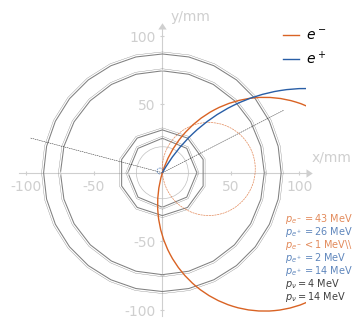

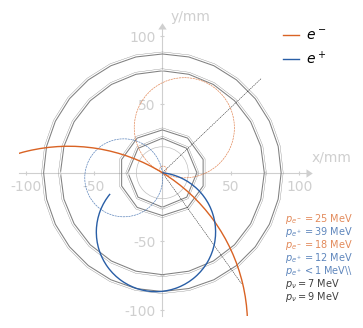

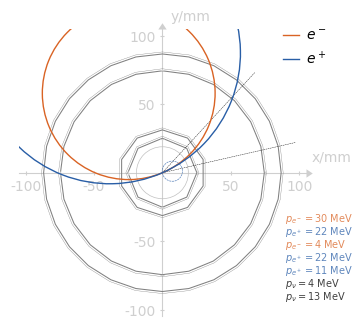

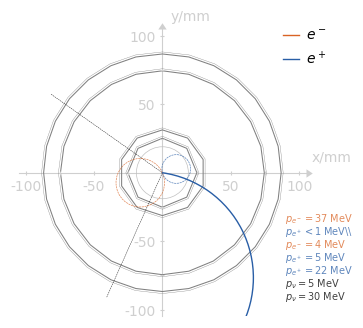

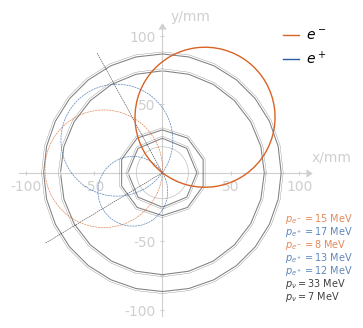

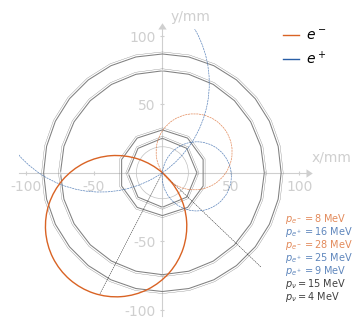

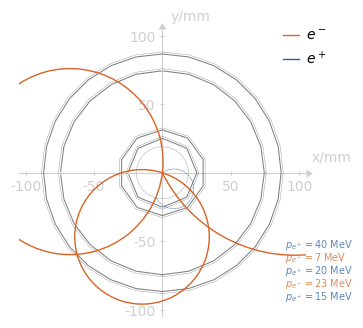

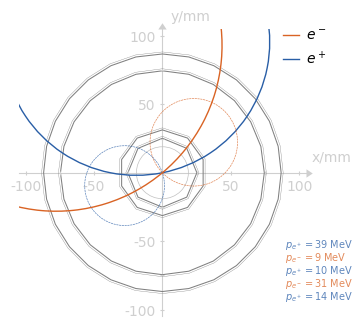

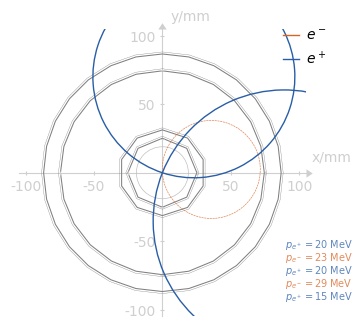

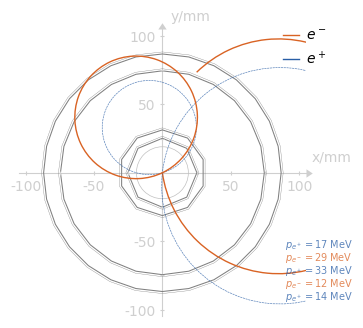

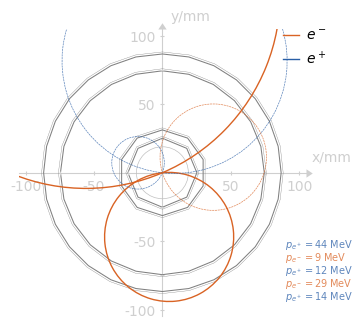

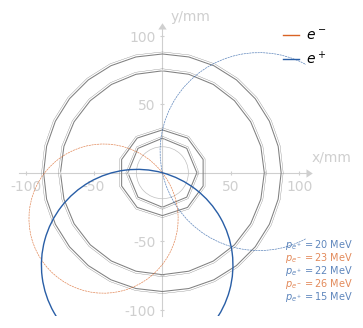

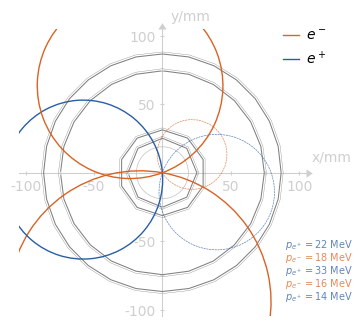

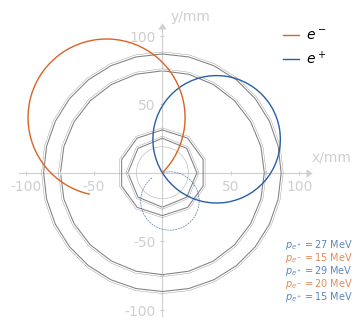

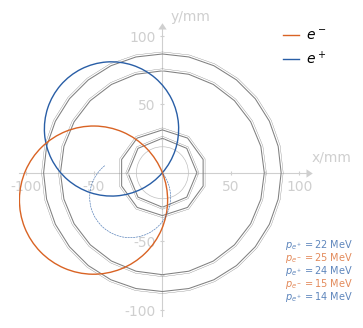

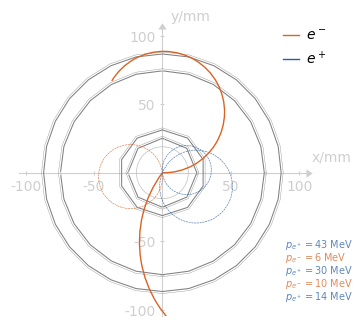

In [402]:
for i in range(0,10):
    anim = pt.EventDraw(mu3e2nu, i, draw_momentum = False, animate = False, density=False)

for i in range(0,10):
    anim = pt.EventDraw(mu5e2nu, i, draw_momentum = False, animate = False, density=False)

for i in range(0,10):
    anim = pt.EventDraw(mu5e, i, draw_momentum = False, animate = False, density=False)


## some animations?

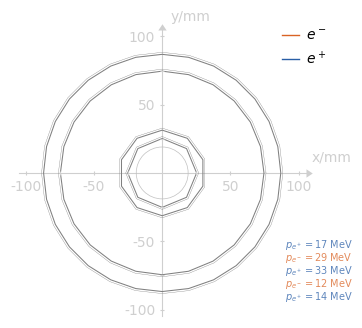

In [403]:
anim = pt.EventDraw(mu5e, 3, draw_momentum = False, animate = True, density=False)
from matplotlib import animation
# f = r"plots/animation.gif" 
# writergif = animation.PillowWriter(fps=100) 
# anim.save(f,  dpi=200, fps=1000)
anim.save('plots/animation.mp4', fps=100, dpi=300) #Frame per second controls speed, dpi       controls the quality 
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=2.0, metadata=dict(artist='M.Hostert.1'), bitrate=1800)
# anim.save('plots/animation.mp4', writer=writer, dpi=400)/

## Some details of the simulation

In [404]:
# Save to file
x, y = np.genfromtxt('Mu3e/exp_params/decays_in_z_position.dat', unpack=True)
zcoeffs = np.polyfit(x, y, 10)
zpos_fit = np.poly1d(zcoeffs)
np.save('Mu3e/exp_params/zpos_fit_pdf.npy', zpos_fit)

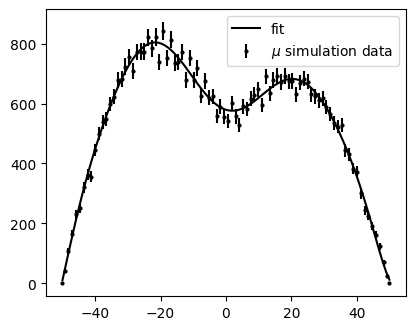

In [405]:
#data generation
fig, ax = pt.std_fig()
ax.errorbar(x, y, yerr= np.sqrt(y), linestyle='None', marker='o', color='k', markersize=2, label=r'$\mu$ simulation data')
z = np.linspace(-50,50,100)
ax.plot(z, zpos_fit(z), color='k', label='fit')
ax.legend()

In [ ]:
# nsamples = int(1e6)
# P = np.random.uniform(0,53, nsamples)
# P = dn.Cfourvec.random_normal(P, 0.2*P/P)
# phi = np.random.uniform(0,2*np.pi, nsamples)
# cphi = np.cos(phi)
# sphi = np.sin(phi)
# ctheta = np.random.uniform(-1,1, nsamples)
# stheta = np.sqrt(1 - ctheta**2)
# angle_lambda = np.pi/2 - np.arccos(ctheta)

# p = np.array([np.sqrt(P**2 + lp.e_minus.mass**2), P*stheta*cphi, P*stheta*sphi, P*ctheta]).T

array([ -6.85099323,  -2.30524055, -10.32746816, ...,  -8.64059023,
         0.70443817,   2.28979417])

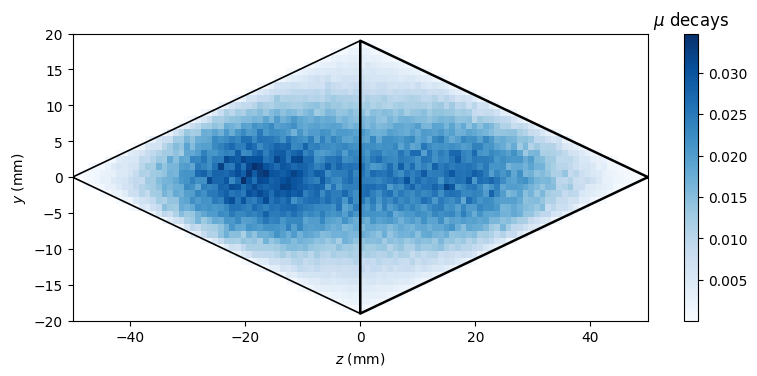

In [412]:
scale_factor = 10/5
fig, ax = pt.std_fig(figsize=(pt.std_figsize[0]*scale_factor,pt.std_figsize[1]))

h = ax.hist2d(mu5e.z, mu5e.y, weights=mu5e.weights/np.max(mu5e.weights)/100/40, bins=(100,40), cmap='Blues', cmin=1e-100, density=False)
cb = fig.colorbar(h[3], ax=ax)
cb.ax.set_title(r"$\mu$ decays")

ax.plot([-50,0,0,-50],[0,19,-19,0], color='black', lw=1.2)
ax.plot([50,0,0,50],[0,19,-19,0], color='black', lw=1.8)

ax.set_ylim(-20,20)
ax.set_xlim(-50,50)
ax.set_xlabel(r'$z$ (mm)')
ax.set_ylabel(r'$y$ (mm)')

fig.savefig('plots/target_z_y.png', dpi=400, bbox_inches='tight')


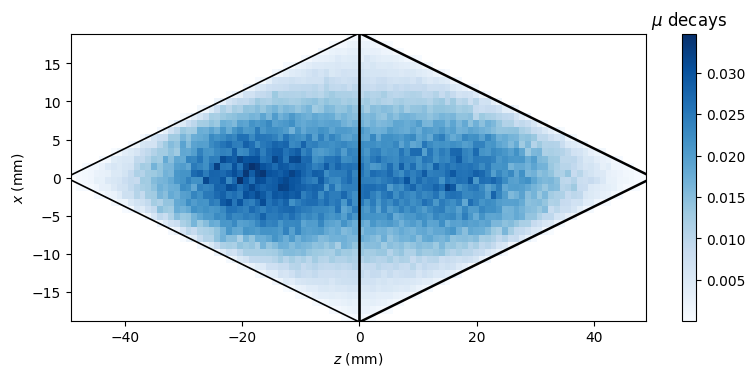

In [414]:
scale_factor = 10/5
fig, ax = pt.std_fig(figsize=(pt.std_figsize[0]*scale_factor,pt.std_figsize[1]))

h = ax.hist2d(mu5e.z, mu5e.y, weights=mu5e.weights/np.max(mu5e.weights)/100/40, bins=(100,40), cmap='Blues', cmin=1e-100, density=False)
cb = fig.colorbar(h[3], ax=ax)
cb.ax.set_title(r"$\mu$ decays")

ax.plot([-50,0,0,-50],[0,19,-19,0], color='black', lw=1.2)
ax.plot([50,0,0,50],[0,19,-19,0], color='black', lw=1.8)

# ax.set_ylim(-20,20)
# ax.set_xlim(-50,50)
ax.set_xlabel(r'$z$ (mm)')
ax.set_ylabel(r'$x$ (mm)')

fig.savefig('plots/target_z_x.png', dpi=400, bbox_inches='tight')


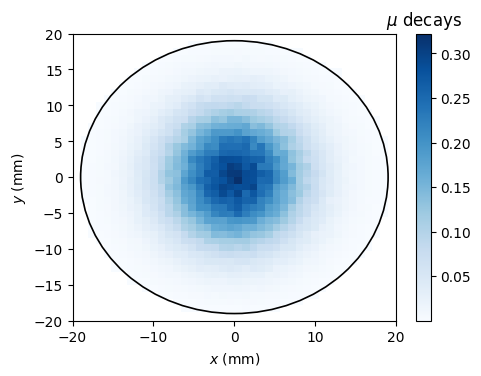

In [415]:
scale_factor = 4.5/4
fig, ax = pt.std_fig(figsize=(pt.std_figsize[0]*scale_factor,pt.std_figsize[1]))

h = ax.hist2d(mu5e.x, mu5e.y, weights=mu5e.weights/np.max(mu5e.weights)/40/40, bins=(40,40), cmap='Blues', cmin=1e-100, density=False)
cb = fig.colorbar(h[3], ax=ax)
cb.ax.set_title(r"$\mu$ decays")

circle=plt.Circle((0,0),19, fill=False, color='black', lw=1.2)
ax.add_patch(circle)

ax.set_ylim(-20,20)
ax.set_xlim(-20,20)
ax.set_xlabel(r'$x$ (mm)')
ax.set_ylabel(r'$y$ (mm)')

fig.savefig('plots/target_x_y.png', dpi=400, bbox_inches='tight')


In [416]:
## Old stuff...


In [430]:
# vel in z direction    
beta_L = p[-1]/p[0]

# transverse p and velocity
pT = np.sqrt(p[1]**2 + p[2]**2)
beta_T = pT/p[0]
theta = np.arccos(p[-1]/(p[-1]**2 + pT**2))

arc_R = fm.radius_of_curvature(pT, Bfield=1.0)
t_exit = fm.time_of_exit(fm.layer4_L, beta_L)
max_arc_angle = t_exit*beta_T/(2*np.pi*arc_R) * 180 if arc_R > 0 else 0# degrees

max_arc_angle

0

In [256]:
from Mu3e import mudecays

In [ ]:
mudecays.

In [247]:
nsamples = int(1e6)
P = np.random.uniform(0,53, nsamples)
P = dn.Cfourvec.random_normal(P, 0.2*P/P)
phi = np.random.uniform(0,2*np.pi, nsamples)
cphi = np.cos(phi)
sphi = np.sin(phi)
ctheta = np.random.uniform(-1,1, nsamples)
stheta = np.sqrt(1 - ctheta**2)
angle_lambda = np.pi/2 - np.arccos(ctheta)

p = np.array([np.sqrt(P**2 + lp.e_minus.mass**2), P*stheta*cphi, P*stheta*sphi, P*ctheta]).T

pT = np.sqrt(p[:,1]**2 + p[:,2]**2)
pL = p[:,3]
E = p[:,0]
beta_L = pL/E
beta_T = pT/E

R_field = fm.radius_of_curvature(pT, Bfield=1.0)
# t_recurl = fm.time_of_recurl(R_field, beta)
z_recurl = t_recurl * beta_L * dm.c_light


hit_recurler = (np.abs(z_recurl) > fm.recurler_L/2 + fm.outer_recurler_gap) & (np.abs(z_recurl) < fm.recurler_L/2 + fm.recurler_L + fm.outer_recurler_gap)
long_track =  (np.abs(z_recurl) < fm.recurler_L/2) | hit_recurler
short_track = (2*R_field > 82)
cuts = short_track & long_track
# cuts = long_track

NameError: name 'R_field' is not defined

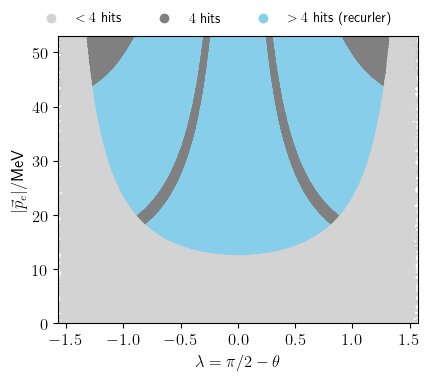

In [435]:
fig, ax = pt.std_fig()
size=5
h = ax.scatter(angle_lambda[~short_track], P[~short_track], s=size, color='lightgrey', zorder=2, edgecolor='None')
h = ax.scatter(angle_lambda[~long_track], P[~long_track], s=size, color='grey', zorder=1, edgecolor='None')
h = ax.scatter(angle_lambda[cuts], P[cuts], s=size, color='skyblue', zorder=0, edgecolor='None')

h = ax.scatter([],[], color='lightgrey', label=r'$< 4$ hits')
h = ax.scatter([],[], color='grey', label=r'$4$ hits')
h = ax.scatter([],[], color='skyblue', label=r'$> 4$ hits (recurler)')


# h = ax.hist2d(angle_lambda, P, bins=500, weights=cuts, cmap='bone_r', norm=plt.Normalize(vmin=0, vmax=1), zorder=0, alpha=0.5)

ax.set_xlabel(r'$\lambda = \pi/2-\theta$')
ax.set_ylabel(r'$|\vec{p}_e|$/MeV')
ax.set_xlim(-np.pi/2, np.pi/2)
ax.set_ylim(0,53)
fig.legend(loc='upper center', ncol=3, fontsize=10)

fig.savefig('plots/recurler_hits.png', dpi=400, bbox_inches='tight')

In [39]:
fig, ax = pt.std_fig()
size=5
# h = ax.scatter(angle_lambda[~short_track], P[~short_track], s=size, color='lightgrey', label='no hits', zorder=1, edgecolor='None')
# h = ax.scatter(angle_lambda[~long_track], P[~long_track], s=size, color='grey', label='no recurler hits', zorder=2, edgecolor='None')
# h = ax.scatter(angle_lambda[cuts], P[cuts], s=size, color='skyblue', label='recurler hits', zorder=0, edgecolor='None')

h = ax.hist2d(ctheta, P, bins=500, weights=cuts, cmap='bone_r', norm=plt.Normalize(vmin=0, vmax=1), zorder=0, alpha=0.5)

ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel(r'$|\vec{p}_e|$/MeV')
ax.set_xlim(-1, 1)
ax.set_ylim(0,60)
ax.legend(loc='upper left', ncol=3)

NameError: name 'ctheta' is not defined